<a href="https://colab.research.google.com/github/luizmv8080/aprendizaje-profundo/blob/main/Tarea1/Ejercicio_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Red de unidades de umbral lineal

La arquitectura de nuestra red neuronal que simulara la compuerta XNOR será de la forma que se muestra en la imagen de abajo:

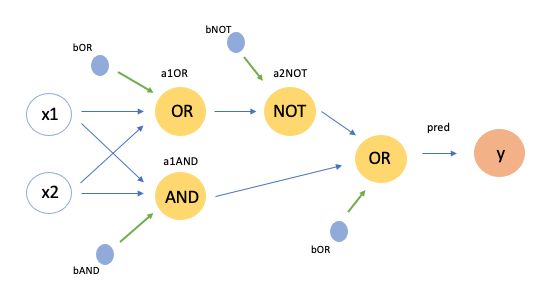

In [1]:
import numpy as np

## Definimos nuestra funcion de activación que sera la funcion escalon:

In [2]:
def funcionEscalon(z):
  return np.heaviside(z,1)

### Procedemos a crear nuestra red de neuronas que funcionaran como una compuerta XNOR:

In [30]:
def compuertaXNOR(x):

  #Definimos los pesos y el sesgo para la neurona OR
  wOR = np.array([[1],[1]])
  bOR = -0.5

  #Definimos los pesos y el sesgo para la neurona NOT
  wNOT =  -1
  bNOT = 0.5

  #Definimos los pesos y el sesgo para la neurona AND
  wAND = np.array([[1],[1]])
  bAND = -1.5

  #Al pasar la entrada "x" por la primera neurona OR se le aplicara la funcion Escalon
  z1OR = np.dot(wOR.T,x) + bOR
  a1OR = funcionEscalon(z1OR)

  #Las entradas "x" tambien pasaran por la neurona AND y se les aplicara la funcion Escalon
  z1AND = np.dot(wAND.T,x) + bAND
  a1AND = funcionEscalon(z1AND)

  #Lo que sale por la primera neurona OR (a1OR) ahora pasara por la neurona NOT y al salir se le aplica la funcion Escalon
  z2NOT = wNOT*a1OR + bNOT
  a2NOT = funcionEscalon(z2NOT)

  #Lo que salio de la neurona NOT (a2NOT) como lo que salio de la neurona AND (a1AND) ahora seran entradas para la ultima
  #neurona OR y lo que arroje, sera la prediccion de una compuerta XNOR
  z3OR = np.dot(wOR.T,np.array([a2NOT[0],a1AND[0]]))+bOR
  pred = funcionEscalon(z3OR)

  #Retornamos la prediccion dada por nuestra red neuronal
  return pred



### Probamos nuestra red neuronal:

In [31]:
entrada = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
for i in range(entrada.shape[0]):
  print(compuertaXNOR(entrada[i]))

[1.]
[0.]
[0.]
[1.]
